In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import warnings
warnings.filterwarnings("ignore")

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

![title](figs/title.png)

<h1><center>Module 10: Regression</center></h1>

In general most of the regression problems can be described mathematically as:


<center>Find $m$ such that $F(m)$ is minimized. </center>

where $m$ is model parameters to be optimized, which can be a single variable or a vector, and function $F$ is the penalty function. 

There are two key components of a regression problem: the design of the penalty function and the algorithm to find $m$ that minimize the penalty function. 
Penalty function usually contains a data misfit term and a regularization term. Data misfit related to the value difference between the model predicted data and the real measured data. A common function to estimate the data misfit is the $L_2$ norm of the misfit vector. The regularization term represents our prior knowledge of the model and of the problem. There are many kinds of regularizations, and a few will be introduced later in this section. 

We will also introduce several regression algorithms to solve the minimization problem. 

## Linear Least Square Regression

The linear problems we have learned so far are all balanced or square system, in which the number of equations equals the number of unknowns. However, in the real cases, overdetermined linear systems are much more common: we almost always take more measurements than the unknowns in order to reduce the effect of noises. How can we solve a overdetermined system?

Consider an overdetermined linear system $A x = b$, where $A$ is a $n \times m$ rectangular matrix, where $n > m$. We also require $A$ to be full rank. Due to the error in the measurement $b$, in most cases there are no $x$ existing that fully satisfies all the equations in the system. 

To solve the problem, we need to find a $x$ that minimize the error between the model prediction ($Ax$) and measurement ($b$), which can be presented by a column vector as:
$$ e = Ax - b $$

The most common way to solve $x$ is to minimize L-2 norm of the error vector $e$, which is defined as:
$$
E = \sum_{i=1}^{m} e_i^2 = e^T e
$$
where $e^T$ is the transpose of $e$. 

By substituting $e = Ax-b$, we have
$$
E = e^Te = (Ax-b)^T(Ax-b) = x^TA^TAx - b^TAx - x^TA^Tb + b^Tb = x^TA^TAx - 2x^TA^Tb + b^Tb
$$
To find $x$ that minimizes $E$, we set the derivatives of $E$ with respect to $x$ to zero:
$$
\frac{\partial E}{\partial x} = -2 A^Tb + 2A^T A x = 0
$$
which gives us one of the **normal equations**:
$$
A^T A x = A^T b \\
A^\dagger x=b^\dagger
$$
This brings us back the problem we have learned in the last section, where $A^\dagger = A^TA$ is a full-rank square matrix, $b^\dagger = A^T b$ is a column vector. 

### Exercise
By knowing the following matrix differentiation rules, please prove the normal equations. 
$$
\alpha = A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A
$$
$$
\alpha = x^T A  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A^T
$$
$$
\alpha = x^T A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = x^T \left(A + A^T \right)
$$
The proof of the matrix differentiation rules can be found [here](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf).

## 1-D Linear Regression: Fitting a Straight Line

Two variables $\alpha$ and $\beta$ that we know are linearly related, which can be presented as
$$
\beta = c_1 \alpha + c_0
$$
where $a$ and $b$ are the unknown constant to be determined. By taking a series of measurements, we have $n$ data points $(\alpha_1,\beta_1), (\alpha_2,\beta_2),..., (\alpha_n,\beta_n)$. The goal is to find the optimized $a$ and $b$ such that the error
$$
\varepsilon^2 = \sum_{i=1}^{n} \left( c_1\alpha_i + c_0 - \beta_i \right)^2
$$
is minimized.

This problem is equivalent to the least-square problem we just discussed, if we rewrite the problem in the matrix form as:

$$
e = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right]
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right]
- 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$
and by minimizing $e^Te$ we have
$$
A^T A x = A^T b
$$
where
$$
A = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right], \ \ \ \ \ 
x = 
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right], \ \ \ \ \ 
b = 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$

$c_0$ and $c_1$ can be solved by
$$
\left[ \begin{matrix}
c_1 \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

True answer: c_1:0.5,c_0:3.4
Inverted answer: c_1:0.50,c_0:3.40
[[3951.48413274  -37.18062038]
 [ -37.18062038  100.        ]]


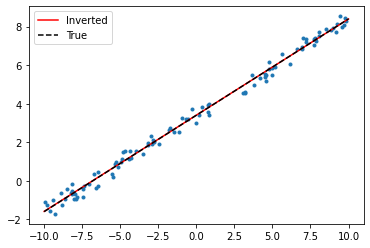

In [2]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
x = (np.random.rand(100)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Inverted answer: c_1:{:.2f},c_0:{:.2f}'.format(para[0],para[1]))


predict_x = np.array([-10,10])
predict_y = para[0]*predict_x+para[1]

print(A_dagger)

plt.figure()
plt.plot(x,y,'.')
plt.plot(predict_x,predict_y,'r',label='Inverted')
plt.plot(predict_x,true_fun(predict_x),'k--',label='True')
plt.legend()
plt.show()

In [3]:
para

array([0.49941652, 3.40463203])

## 1-D Polynomial Curve Fitting
It makes sense that we can use linear least square method to solve a linear function problem, but what if the variables $\alpha$ and $\beta$ are not related linearly, but through a $m^{th}$-order polynomial function?

$$
\beta = c_m \alpha^m + c_{m-1} \alpha^{m-1} + ... + c_1 \alpha + c_0
$$

It turns out that we can use the exact same setting as the linear equation, by forming matrix and vectors as:

$$
A =  \left[ \begin{matrix}
\alpha_1^m & \alpha_1^{m-1} & ... & \alpha_1 & 1 \\
\alpha_2^m & \alpha_2^{m-1} & ... & \alpha_2 & 1 \\
\vdots & \vdots & ... & \vdots & \vdots \\
\alpha_n^m & \alpha_n^{m-1} & ... & \alpha_n & 1 \\
\end{matrix} \right], \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ \vdots \\ c_0
\end{matrix} \right], \ \ \ \ \ 
b = 
\left[ \begin{matrix}
\beta_m \\ \beta_{m-1} \\ \vdots \\ \beta_0
\end{matrix} \right], 
$$

same as above, the coefficients $c_0,c_1,...,c_m$ can be solved by:

$$
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ ... \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

True answer:  [1, 2, 3, 4, 5]
Inverted answer:  [1.02159451 1.95296411 2.96590652 4.09661619 4.9298653 ]
Error Sensitivity: [0.83578956 0.84652905 2.77286602 2.08936566 1.42588452]


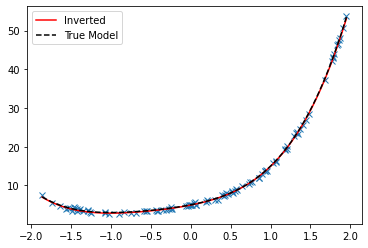

In [4]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c = [1,2,3,4,5]
noise_level = 1
true_fun = lambda x: np.polyval(c,x)

# generate the data
x = (np.random.rand(100)-0.5)*4
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.ones((len(x))).reshape(-1,1)
for i in range(1,len(c)):
    A = np.hstack((x.reshape(-1,1)**i,A))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: ',c)
print('Inverted answer: ',para)
Ad = np.linalg.inv(A.T@A)@A.T
print('Error Sensitivity:',np.sum(np.abs(Ad),axis=1))

predict_x = np.linspace(np.min(x),np.max(x),100)
para[0] = 1
predict_y = np.polyval(para,predict_x)

plt.figure()
plt.plot(x,y,'x')
plt.plot(predict_x,predict_y,'r',label='Inverted')
plt.plot(predict_x,true_fun(predict_x),'k--',label='True Model')
plt.legend()
plt.show()

## 2-D Polynomial Surface Fitting

The same idea applies to higher dimension problems. Say variable $\gamma$ is depended on variables $\alpha$ and $\beta$ through a 2-D 2nd-order polynomial function
$$
\gamma = c_0 + c_1\alpha + c_2 \alpha^2 + c_3 \alpha \beta + c_4 \beta + c_5 \beta^2 
$$
we can again form the linear equation set $Ax$ with
$$
A = 
\left[ \begin{matrix}
\beta_1^2 & \beta_1 & \alpha_1\beta_1 &\alpha_1^2 &\alpha_1 & 1 \\
\beta_2^2 & \beta_2 & \alpha_2\beta_2 &\alpha_2^2 &\alpha_2 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\beta_n^2 & \beta_n & \alpha_n\beta_n &\alpha_n^2 &\alpha_n & 1
\end{matrix} \right], \ \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_5 \\ c_4 \\ c_3 \\ c_2 \\ c_1 \\ c_0  
\end{matrix} \right] 
$$
and solve it using least square method.

### Weighted Least Square Method

One of the problem for least square inversion is that it is very sensitive to outliers or measurements with large error, due to the nature of $L_2$ norm. 

One way to reduce the impact of bad data is to give them less weight in the error function. 
Because the actual problem we solve for least square problems is to minimize $||Ax-b||_2$, the elementary operations of linear equation set do not apply any more (except for the interchange rule). By multiplying one row of $A$ and $b$ at the same time, we change the ratio of the prediction error of the measurement in the total error. This gives us the opportunity to apply different weights to the measurements with different accuracy.

Multiple each row with a different weight $w_i$, the error $e$ can be written as
$$
e = WAx - Wb = A'x - b'
$$
where $A' = WA$, $b' = Wb$, and $W$ is a diagonal matrix with $W_{ii} = w_i$.

Replacing $A'$ and $b'$ in the normal equations we have
$$
(WA)^T(WA)x = (WA)^TWb \\
A^T W^T W A x = A^T W^T W b \\
A^T W' A x = A^T W' b
$$
where $W' = W^TW$, which is also a diagonal matrix with $W'_{ii} = w_i^2$.

True answer: c_1:0.5,c_0:3.4
Least Square answer: c_1:0.28,c_0:3.95
Weighted Least Square answer: c_1:0.48,c_0:3.51


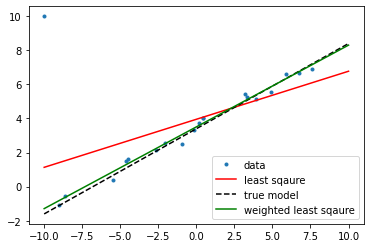

In [5]:
# demonstration of effect of outlier to least sqaure inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
data_number = 20
x = (np.random.rand(data_number)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(data_number)-0.5) # add noise to data

# add an outlier
y[10] = 10
x[10] = -10

# perform normal least-square fitting
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# perform weighted least-square fitting
w = np.ones(data_number)
w[10] = 0.1 # change the weight of the outlier
W = np.diag(w**2)
A_dagger = A.T.dot(W).dot(A)
para_w = np.linalg.inv(A_dagger).dot(A.T.dot(W).dot(y))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Least Square answer: c_1:{:.2f},c_0:{:.2f}'.format(para[0],para[1]))
print('Weighted Least Square answer: c_1:{:.2f},c_0:{:.2f}'.format(para_w[0],para_w[1]))

predict_x = np.array([-10,10])
predict_y = para[0]*predict_x+para[1]
predict_y_w = para_w[0]*predict_x+para_w[1]

plt.figure()
plt.plot(x,y,'.',label='data')
plt.plot(predict_x,predict_y,'r',label = 'least sqaure')
plt.plot(predict_x,true_fun(predict_x),'k--', label='true model')
plt.plot(predict_x,predict_y_w,'g',label = 'weighted least sqaure')
plt.legend()
plt.show()

#### Weight Selection

Ideally the weight $w_i$ of each measurement should be one over its standard deviation. For example, if the measurements are carried out by two different instruments, with one being less than accurate the other, we should weight the measurements differently based on their instrument precision (standard deviation). 

In the real situation many outliers are due to data error or instrument instability, of which the standard deviation is difficult to estimate. In this case we can solve the problem iteratively:

1. Perform a regular least-square inversion. 
2. Calculate the error of each measurement.
3. Weight each measurement (row) based on the prediction error.
4. Perform weighted least-square inversion.

Step 2-4 should be repeated several times until the inversion result is stabilized. 

True answer: c_1:0.5,c_0:3.4
Weighted Least Square answer: c_1:0.51,c_0:3.53


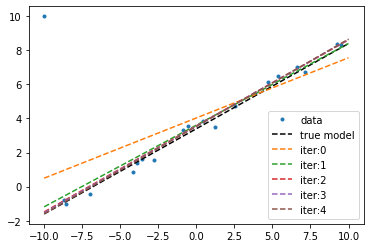

In [6]:
# demonstration of effect of outlier to least sqaure inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
data_number = 20
x = (np.random.rand(data_number)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(data_number)-0.5) # add noise to data

# add an outlier
y[10] = 10
x[10] = -10

plt.figure()
plt.plot(x,y,'.',label='data')
predict_x = np.array([-10,10])
plt.plot(predict_x,true_fun(predict_x),'k--', label='true model')
# perform iterative weighted least-square fitting
w = np.ones(data_number)
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
for iter_i in range(5):
    W = np.diag(w**2)
    A_dagger = A.T.dot(W).dot(A)
    para_w = np.linalg.inv(A_dagger).dot(A.T.dot(W).dot(y))
    y_pre = para_w[0]*x+para_w[1]
    err = np.abs(y_pre-y)
    w = 1/err**0.5
    predict_y_w = para_w[0]*predict_x+para_w[1]
    plt.plot(predict_x,predict_y_w,'--', label='iter:{}'.format(iter_i))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Weighted Least Square answer: c_1:{:.2f},c_0:{:.2f}'.format(para_w[0],para_w[1]))


plt.legend()
plt.show()

### Least Square Regularization

Although for least square problem $Ax=b$, the number of equations is usually much larger than the number of unknowns (the number of rows >> the number of columns for $A$), this does not guarantee the matrix $A^\dagger = A^TA$ is always full rank. 

A quick demonstration shows as follow:


In [11]:
A = np.array([[1,2,3,1,1],[3,2,1,0,0],[1,4,6,5,5],[3,2,6,0,0],[2,65,2,2,2],[3,2,6,3,3],[6,3,6,2,2]])
print('A=')
print(A)
# calculate A dagger
Ad = A.T.dot(A)
print('ATA=')
print(Ad)
# calculate A dagger inversion
print('ATA^-1=')
print(np.linalg.inv(Ad))

# true answer
x =np.array([1,2,3,4,5]).reshape(-1,1)
# calculate synthetic data
b = A.dot(x)
# perform inversion
x_inv = np.linalg.inv(Ad).dot(A.T).dot(b)
print('true x:',x.flatten())
print('inverted x:',x_inv.flatten())

A=
[[ 1  2  3  1  1]
 [ 3  2  1  0  0]
 [ 1  4  6  5  5]
 [ 3  2  6  0  0]
 [ 2 65  2  2  2]
 [ 3  2  6  3  3]
 [ 6  3  6  2  2]]
ATA=
[[  69  172   88   31   31]
 [ 172 4266  204  164  164]
 [  88  204  158   67   67]
 [  31  164   67   43   43]
 [  31  164   67   43   43]]
ATA^-1=


LinAlgError: Singular matrix

The reason of large error in the inversion result is that the last two columns of $A$ are identical, which makes $A^\dagger$ not full rank. The matrix inversion of $A^\dagger$ is performed using iteration method, which generates large numerical error in the inversion.
In order to resolve this kind problem, we can regulate the model (unknowns) using our knowledge of the problem. This knowledge does not have to be accurate, but serve as important constrains to stabilize the inversion. 

A commonly used regularization is to minimize the $L_2$ norm of all the unknowns. We can rewrite the normal equation as:
$$
(A^TA + \alpha I)x = A^Tb
$$
where $\alpha$ is the weight of the regularization, which is a constant to be chosen. This type of regulation is called [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization).

In [12]:
# continue from the last code cell
alpha = .01
x_regu = np.linalg.inv(A.T.dot(A)+alpha*np.identity(A.shape[1])).dot(A.T.dot(b))
print('True answer: ',x.flatten())
print('Inverted answer: ',x_regu.flatten())

True answer:  [1 2 3 4 5]
Inverted answer:  [0.99918729 2.00007375 3.00142044 4.49852262 4.49852262]


Now the first three unknowns can be correctly inverted. We still cannot invert the last two unknowns correctly, because there is no information provided from the data to distinguish the last two unknowns. 

Besides Tikhonov regularization, we can also put other kinds constraint based on our knowledge on the model. In general, any constraint can be written in a form as:
$$
\Gamma x = \gamma
$$
can be put into the normal equation as:
$$
(A^TA + \alpha \Gamma^T\Gamma)x = A^Tb + \alpha\Gamma^T\gamma
$$
This is equivalent to solving two least square problems $Ax=b$ and $\Gamma x = \gamma$ at the same time with different weight. Actually, we can concatenate $\Gamma$ and $\gamma$ to the end of matrix $A$ and vector $b$ to perform the regularization.
$$
A^* = 
\begin{bmatrix}
A \\ \alpha\Gamma
\end{bmatrix}, \ \ \ 
b^* = 
\begin{bmatrix}
b \\ \alpha \gamma
\end{bmatrix}\\
A^{*T}A^* x = A^{*T}b^*
$$

In the previous example, if we have the knowledge that the difference between the nearby unknown is 1, we can put this knowledge as regularization to the problem.

In [13]:
# continue from the last code cell
alpha = 0.01

# form regularization matrix
N = A.shape[1]
Gamma = np.zeros((N-1,N))
for i in range(N-1):
    Gamma[i,i] = 1
    Gamma[i,i+1] = -1
g = -np.ones(N-1).reshape(-1,1)

# Concatenate regularization to A and b
As = np.vstack([A,alpha*Gamma])
bs = np.vstack([b,alpha*g])

x_regu = np.linalg.inv(As.T.dot(As)).dot(As.T.dot(bs))
print('True answer: ',x.flatten())
print('Inverted answer: ',x_regu.flatten())

True answer:  [1 2 3 4 5]
Inverted answer:  [1. 2. 3. 4. 5.]


## Non-linear regression


Unfortunately, most of the numerical models nowadays are highly non-linear, and the associated regression problems can not be solved using matrix inversion. In this section, we discuss several algorithms that solve non-linear regression problems. 

### Grid Search

One way for solving a nonlinear inversion problem is to exhaustively test all possible solutions and pick the one with the smallest error $E(m)$. Of course, in the real situation, it is always impossible to example every possible solution, but it is possible to examine a large set of trail solutions within the range of interest. When the trail solutions are drawn from a regular grid in model space, this procedure is called a **grid search** procedure. 


In the follwing examples, we use a highly non-linear function
$$
y=sin(20\alpha x)+\alpha\beta
$$
to demonstrate different algorithms. $\alpha$ and $\beta$ are the unknown parameters to be optimized. The data are generated synthetically with a certain amount of Gaussian noise added. 


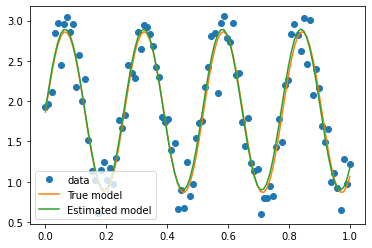

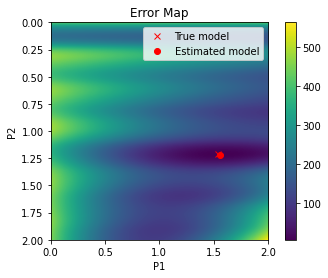

In [14]:
# define your model
def fun(para,x):
    p1,p2 = para
    y = np.sin(20*p1*x)+p1*p2
    return y

# define the penalty function
def err_fun(para,x,data):
    predict_data = fun(para,x)
    err = predict_data - data
    err = np.sum(err**2) # error is the L2 norm of the misfit
    return err
    
# generate data with noise
x = np.linspace(0,1.0,100)
true_p1 = 1.21; true_p2 = 1.54;
data = fun([true_p1,true_p2],x)
data += np.random.normal(0,0.2,len(data)) # add noise

# grid search possible parameteres
p1_min = 0; p1_max = 2;
p2_min = 0; p2_max = 2;
p1_array = np.linspace(p1_min,p1_max,200)
p2_array = np.linspace(p2_min,p2_max,200)
err_map = np.zeros((len(p1_array),len(p2_array)))
for i,p1 in enumerate(p1_array):
    for j,p2 in enumerate(p2_array):
        err_map[i,j] = err_fun([p1,p2],x,data)
# find the parameter combination with minimal error
mini,minj = np.unravel_index(np.argmin(err_map),err_map.shape)
est_p1 = p1_array[mini]
est_p2 = p2_array[minj]
        
# making plots
plt.figure()
plt.plot(x,data,'o',label='data')
plt.plot(x,fun([true_p1,true_p2],x),label='True model')
plt.plot(x,fun([est_p1,est_p2],x),label='Estimated model')
plt.legend()

plt.figure()
plt.imshow(err_map,extent=[p2_array[0],p2_array[-1],p1_array[-1],p1_array[0]])
plt.plot(true_p2,true_p1,'rx',label='True model')
plt.plot(est_p2,est_p1,'ro',label='Estimated model')
plt.legend()
plt.colorbar()
plt.title('Error Map')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()
    
    

### The Monte Carlo Search

Although grid search guarantees to find the solution within the search range, it is very computational expensive. Also, no results can be obtained until the entire computation finished. A modification of grid search is the Monte Carlo search. Instead of search the solution space in a sequential order, the Monte Carlo search generate random trails and search for a solution that is better than the one it has seen. Computationally, it has only minor advantages over the grid search. However, it has one good property: the longer the algorithm runs, the better results it gets. 

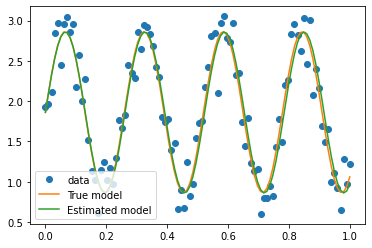

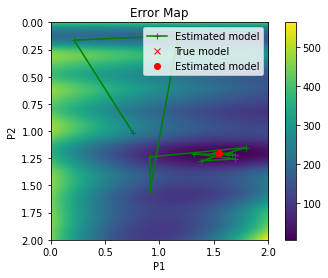

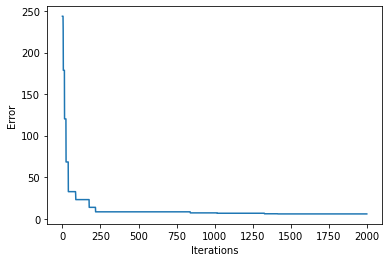

In [15]:
# Monte Carlo search, data and penalty function are generated from previous example
test_N = 2000
err_hist = np.zeros(test_N)
current_err = np.Inf
para_hist = []
for i in range(test_N):
    p1 = np.random.uniform(p1_min,p1_max)
    p2 = np.random.uniform(p2_min,p2_max)
    err = err_fun([p1,p2],x,data)
    if err < current_err:
        current_err = err
        current_para = [p1,p2]
        para_hist.append(current_para)
    err_hist[i] = current_err

est_p1,est_p2 = current_para
para_hist = np.array(para_hist)
# making plots
def make_plots():
    plt.figure()
    plt.plot(x,data,'o',label='data')
    plt.plot(x,fun([true_p1,true_p2],x),label='True model')
    plt.plot(x,fun([est_p1,est_p2],x),label='Estimated model')
    plt.legend()

    plt.figure()
    plt.imshow(err_map,extent=[p2_array[0],p2_array[-1],p1_array[-1],p1_array[0]])
    plt.plot(para_hist[:,1],para_hist[:,0],'-+g',label='Estimated model')
    plt.plot(true_p2,true_p1,'rx',label='True model')
    plt.plot(est_p2,est_p1,'ro',label='Estimated model')
    plt.legend()
    plt.colorbar()
    plt.title('Error Map')
    plt.xlabel('P1')
    plt.ylabel('P2')
    plt.show()

    plt.figure()
    plt.plot(err_hist)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()

make_plots()

### Gradient Decent

Both the grid search and Monte Carlo search methods do not consider the shape of the error function $E(m)$ in the vicinity of a trail solution $m^{(p)}$ to devise a better solution $m^{p+1}$. If the gradient $\Delta E_i = dE/dm_i$ are known or easy to calculate, then we can optimize the location of $m^{p+1}$ using the information obtained around $m^p$.
$$
m^{(j+1)} = m^{(j)} - \alpha \nabla E
$$
where $\alpha$ is a small positive number, usually referred as step size. For gradient decent method, it is critical to choose an appropriate $\alpha$. If $\alpha$ is too large, the iteration may overshot and can never find the minimum. If $\alpha$ is too small, it takes forever to converge. Usually an adaptive $\alpha$ is used to prevent overshot. 

converged at iteration 32, total function evaluations: 172


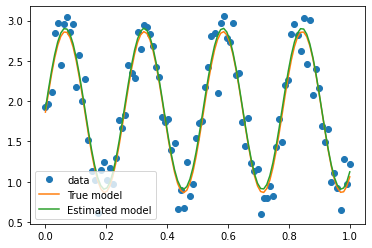

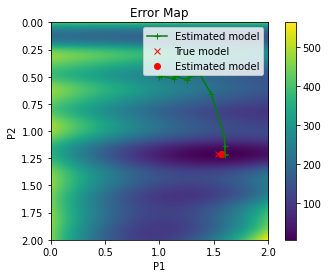

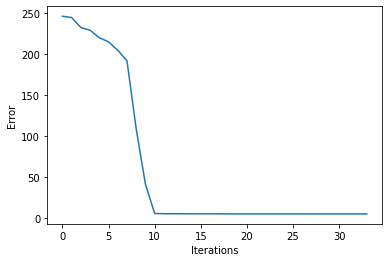

In [16]:
# Gradient decent example
# define initial model and alpha
para0 = [0.5,1.]
alpha0 = 1e-3
iter_max = 100
tol = 1e-6

# calculate gradient using finite difference for generalization. 
# Although there is analytical solution for dEdm in this example.
def dEdm(err_fun,para,x,data,perturb=1e-3):
    G = np.zeros_like(para)
    err0 = err_fun(para,x,data)
    for i in range(len(para)):
        para1 = para.copy()
        para1[i] += para[i]*perturb
        err = err_fun(para1,x,data)
        G[i] = (err-err0)/para[i]/perturb
    return G

# perform gradient decent
current_err = err_fun(para0,x,data)
current_para = np.array(para0)
para_hist = [para0]
err_hist = [current_err]
fun_eval_n = 0
for i in range(iter_max):
    alpha = alpha0
    g = dEdm(err_fun,current_para,x,data)
    fun_eval_n += 3
    dE = 0
    for t in range(10):
        new_para = current_para - alpha*g
        new_err = err_fun(new_para,x,data)
        fun_eval_n += 1
        if new_err < current_err:
            dE = current_err - new_err
            current_err = new_err
            current_para = new_para
            err_hist.append(current_err)
            para_hist.append(current_para)
            break;
        alpha = alpha/10
    
    if np.abs(dE) < tol:
        print(f'converged at iteration {i}, total function evaluations: {fun_eval_n}')
        break;
    
est_p1,est_p2 = current_para
para_hist = np.array(para_hist)

# making plots
make_plots()

### Newton's Method

As shown in the previous example, the step size $\alpha$ is usually  difficult to choose. One way to solve the problem is to involve the second gradient of the error function. 

Expanding $E(m)$ in a Taylor series about the trail solution and keep the first three terms, we obtain the parabolic approximation

$$
E(m) \approx E(m^{(p)}) 
+ \sum_{i=1}^M b_i \left( m_i - m_i^{(p)} \right) \\
+ \frac{1}{2} \sum_{i=1}^M \sum_{j=1}^M B_{ij} 
\left( m_i - m_i^{(p)} \right)
\left( m_j - m_j^{(p)} \right)
$$

where

$$
b_i = \left. \frac{\partial E}{\partial m_i} \right|_{m^{(p)}}
, B_{ij} = \left. \frac{\partial^2 E}{\partial m_i \partial m_j} \right|_{m^{(p)}}
$$
The approximation can also be presented in matrix form:
$$
E(\mathbf m) \approx E(\mathbf m^{(p)})
+ \mathbf b^T \left( \mathbf m - \mathbf m^{(p)} \right)
+\left( \mathbf m - \mathbf m^{(p)} \right)^T \mathbf B \left( \mathbf m - \mathbf m^{(p)} \right)
$$

We can now find the minimum by differentiating this approximation form of $E(m)$ with respect to $m$ and setting the result to zero:

$$
\frac{\partial E (\mathbf m)}{\partial \mathbf m} = 0 \approx \mathbf b 
+ \mathbf B \left( \mathbf m - \mathbf m^{(p)} \right)
$$

From here we can derive the iteration equation for Newton's method:

$$
 \mathbf m^{(p+1)} - \mathbf m^{(p)}  = - \mathbf B^{-1} \mathbf b
$$

$\mathbf B$ is usually refereed as Jacobian matrix. 

**Exercise**: derive Newton's method using matrix differential rules.  (https://atmos.washington.edu/~dennis/MatrixCalculus.pdf)

The finite difference form to calculate the matrix $\mathbf B$ is

$$
\left.
\frac{\partial ^2 E}{\partial m_i \partial m_j} \right|_{m^{(p)}} 
= \left\{
\begin{matrix}
\frac{1}{(\Delta m_i)^2} 
\left\{ E(\mathbf m + \Delta \mathbf m^{(i)}) - 2E(\mathbf m) 
+ E(\mathbf m - \Delta \mathbf m^{(i)}) 
\right\} \ \ \ \ \ \text{for}\ i=j \\
\frac{1}{4\Delta m_i \Delta m_j} 
\left\{ 
E(\mathbf m + \Delta \mathbf m^{(i)} + \Delta\mathbf m^{(j)}) 
-E(\mathbf m + \Delta \mathbf m^{(i)} - \Delta\mathbf m^{(j)}) \\
-E(\mathbf m - \Delta \mathbf m^{(i)} + \Delta\mathbf m^{(j)}) 
+E(\mathbf m - \Delta \mathbf m^{(i)} - \Delta\mathbf m^{(j)}) 
\right\}
\end{matrix} 
\right.
 \ \ \ \ \ \text{for}\ i \neq j
$$

where $\Delta \mathbf m_i = \Delta m_i[0,0,...,1,...,0,0]$

In [17]:
##Python example for Newton's method

# function to calculate Jacobian matrix
def get_Jacobian(err_fun,para,x,data,perturb = 1e-3):
    B = np.zeros((len(para),len(para)))
    err0 = err_fun(para,x,data)
    for i in range(len(para)):
        for j in range(i,len(para)):
            if i==j:
                dmi = para[i]*perturb
                
                para_tmp = para.copy()
                para_tmp[i] += dmi
                err_ip = err_fun(para_tmp,x,data)
                
                para_tmp = para.copy()
                para_tmp[i] -= dmi
                err_im = err_fun(para_tmp,x,data)
                
                B[i,i] = (err_ip+err_im-2*err0)/dmi/dmi
            else:
                dmi = para[i]*perturb
                dmj = para[j]*perturb
                
                para_tmp = para.copy()
                para_tmp[i] += dmi
                para_tmp[j] += dmj
                err_ipjp = err_fun(para_tmp,x,data)
                
                para_tmp = para.copy()
                para_tmp[i] += dmi
                para_tmp[j] -= dmj
                err_ipjm = err_fun(para_tmp,x,data)
                
                para_tmp = para.copy()
                para_tmp[i] -= dmi
                para_tmp[j] += dmj
                err_imjp = err_fun(para_tmp,x,data)
                
                para_tmp = para.copy()
                para_tmp[i] -= dmi
                para_tmp[j] -= dmj
                err_imjm = err_fun(para_tmp,x,data)
                
                B[i,j] = (err_imjm+err_ipjp-err_imjp-err_ipjm)/4/dmi/dmj
                B[j,i] = (err_imjm+err_ipjp-err_imjp-err_ipjm)/4/dmi/dmj
    return B



converged at iteration 3, total function evaluations: 48


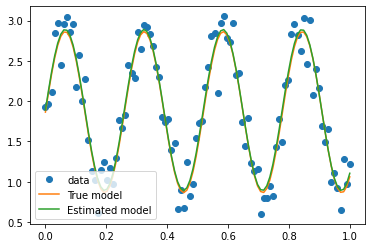

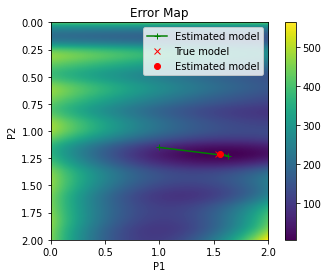

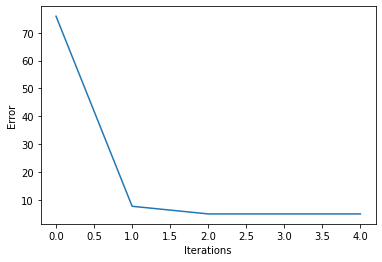

In [18]:
# define initial model 
para0 = [1.15,1.0]
iter_max = 100
tol = 1e-3

# perform Newton method
current_err = err_fun(para0,x,data)
current_para = np.array(para0)
para_hist = [para0]
err_hist = [current_err]
fun_eval_n = 0
for i in range(iter_max):
    b = dEdm(err_fun,current_para,x,data,perturb=1e-3)
    fun_eval_n += 3
    B = get_Jacobian(err_fun,current_para,x,data,perturb=1e-3)
    fun_eval_n += 9
    new_para = current_para - (np.linalg.inv(B)@b.reshape(-1,1)).flatten()
    new_err = err_fun(new_para,x,data)
    dE = current_err - new_err
    err_hist.append(new_err)
    para_hist.append(new_para)
    current_para = new_para
    current_err = new_err
    
    if np.abs(dE) < tol:
        print(f'converged at iteration {i}, total function evaluations: {fun_eval_n}')
        break;
    
est_p1,est_p2 = current_para
para_hist = np.array(para_hist)

# making plots
make_plots()

### Markov Chain Monte Carlo (MCMC)

The Monte Carlo method is completely undirected, while gradient decent based method is directed but easy to converge at local minimum. MCMC method combines the best features of these two methods. It has larger chance to find the global maximum, or at least the range of global maximum, than the Newton's method. It also converge faster than the pure Monte-Carlo method. 

The MCMC method starts with a random initial model, and then random perturb it until it finds a model that produces smaller error, then it update the current model and repeat the process, until a certain number of iterations is achieved, and a final model is recorded. The algorithm then starts a new initial model, and repeat the process. 

The algorithm then collects all the final models, selects the ones with error smaller than a certain threshold, and calculate the statistics of the final results. 

In [19]:
# Python example for MCMC

# set up inversion parameters
para_range = [0,2]
step_size = 0.1
iter_N = 100
chain_N = 100

final_paras = np.zeros((2,chain_N))
final_errs = np.zeros(chain_N)

for ichain in range(chain_N):
    current_para = np.random.uniform(para_range[0],para_range[1],2)
    current_err = err_fun(current_para,x,data)
    for _ in range(iter_N):
        new_para = current_para + np.random.normal(0,1,2)*step_size
        new_err = err_fun(new_para,x,data)
        if new_err < current_err:
            current_para = new_para
            current_err = new_err
    final_paras[:,ichain] = current_para
    final_errs[ichain] = current_err

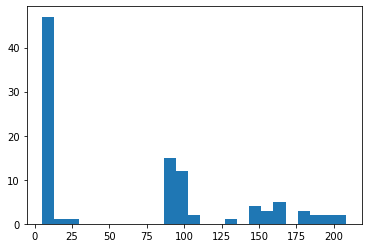

In [20]:
plt.figure()
plt.hist(final_errs,25)
plt.show()

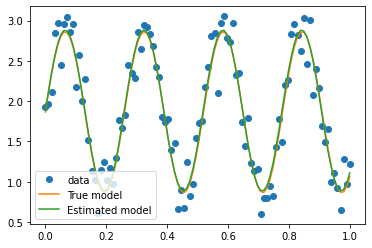

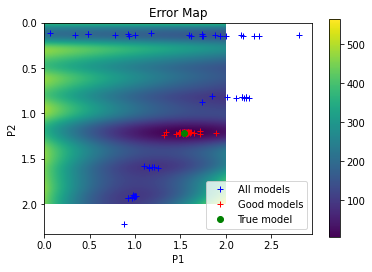

In [21]:
good_ind = final_errs<25
est_para = np.mean(final_paras[:,good_ind],axis=1)
est_p1,est_p2 = est_para

plt.figure()
plt.plot(x,data,'o',label='data')
plt.plot(x,fun([true_p1,true_p2],x),label='True model')
plt.plot(x,fun([est_p1,est_p2],x),label='Estimated model')
plt.legend()

plt.figure()
plt.imshow(err_map,extent=[p2_array[0],p2_array[-1],p1_array[-1],p1_array[0]])
# plt.plot(para_hist[:,1],para_hist[:,0],'-+g',label='Estimated model')
plt.plot(final_paras[1,:],final_paras[0,:],'b+',label='All models')
plt.plot(final_paras[1,good_ind],final_paras[0,good_ind],'r+',label='Good models')
plt.plot(true_p2,true_p1,'go',label='True model')
plt.legend()
plt.colorbar()
plt.title('Error Map')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()



# Acknowledgement

Some of this teaching material is based on:

Kreyszig, E., 2018. Advanced Engineering Mathematics, 10-th edition.

Menke, W., 2018. Geophysical data analysis: Discrete inverse theory. Academic press.